## Codio Activity 2.5: Plotting Multivariate Datasets

In this activity you will focus on creating histograms and scatterplots using `matplotlib`.  You are to generate these plots both using standard plotting commands and the utilities with pandas DataFrame's to plot as a DataFrame method.  Finally, you will customize elements of the plots using additional `matplotlib` functions.

## Index:

- [Problem 1](#Problem-1:-Load-the-Data)
- [Problem 2](#Problem-2:-Features-for-Histograms)
- [Problem 3](#Problem-3:-Histogram-of-Life-Expectancy)
- [Problem 4](#Problem-4:-Adding-a-title-and-human-readable-label)
- [Problem 5](#Problem-5:-Histogram-of-GDP)
- [Problem 6](#Problem-6:-`pandas`-histogram)
- [Problem 7](#Problem-7:-`pandas`-scatterplot)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset: Gapminder

![](images/gapminder-logo.svg)
The data below has been extracted from the [*gapminder*](https://www.gapminder.org/) organization.  Documentation for the larger data sources can be found [here](https://www.gapminder.org/data/documentation/) and the implementation of the data as a python library [here](https://pypi.org/project/gapminder/).  The data contains information on the Gross Domestic Product, Life Expectancy, and Population in five year intervals for countries around the world.

### Problem 1: Load the Data

The dataset is available in the `data` folder and is named `gapminder.csv`. Load this in as `gap_df` below.  

In [2]:
gap_df = pd.read_csv('DataSets_starter/gapminder.csv')
gap_df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


### Problem 2: Features for Histograms

A histogram is a plot that is appropriate for continuous numeric features.  Examine the data and determine a list of columns that are eligible for drawing histograms.  Save your answer as a list of strings that match the column names exactly to `hist_columns` below.

```python
hist_columns = ['col_name_1', 'col_name_2', ...]
```

In [3]:
hist_columns = ['lifeExp','pop','gdpPercap']

### Problem 3: Histogram of Life Expectancy

Use `plt.hist()` to create a histogram of the `lifeExp` column.  Use the `plt.savefig()` method to save the image as `life_exp_hist.png` in the `images` folder.


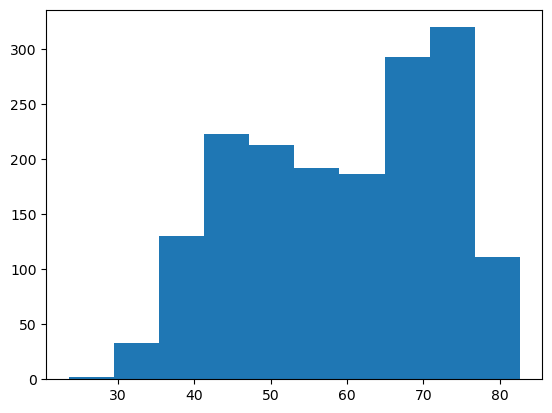

In [6]:
# first to create the images folder 
# it needs to put the plt.savefig() in the same block to produce the figure
plt.hist(gap_df['lifeExp'])
plt.savefig('images/life_exp_hist.png')

In [5]:
# only itself will produce the empty figure
plt.savefig('images/life_exp_hist.png')

<Figure size 640x480 with 0 Axes>

### Problem 4: Adding a title and human readable label

Use the `plt.title()` method to add the title "Histogram of Life Expectancy".  Also, use the `plt.xlabel()` method to add a label to the x-axis "Life Expectancy".  Save your image as `hist2.png` to the `image` folder.

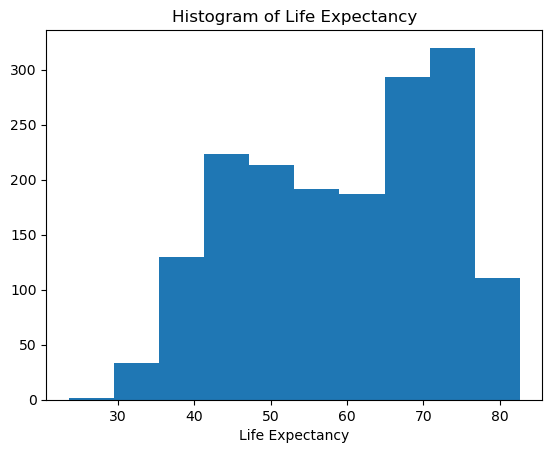

In [7]:
plt.hist(gap_df['lifeExp'])
plt.title('Histogram of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.savefig('images/hist2.png')

### Problem 5: Histogram of GDP

Use matplotlib to create a histogram of the GDP data.  Add the title "Histogram of GDP per capita" and an x-label "GDP Per Capita".  Save your histogram as `gdp_hist.png` to the images folder.

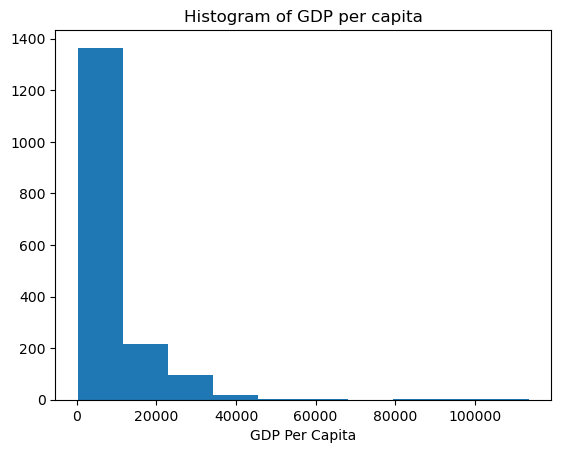

In [8]:
plt.hist(gap_df['gdpPercap'])
plt.title('Histogram of GDP per capita')
plt.xlabel('GDP Per Capita')
plt.savefig('images/gdp_hist.png')

### Problem 6: `pandas` histogram

An alternative way to draw a histogram of a column in a DataFrame is to use the `.hist()` method.  This wraps the matplotlib histogram function and adds a few additional presets like a grid.  Below, select the GDP column and use the `.hist()` method to create a histogram using the built in pandas method. Save your image as `gdp_hist_pandas.png` to the `images` folder.


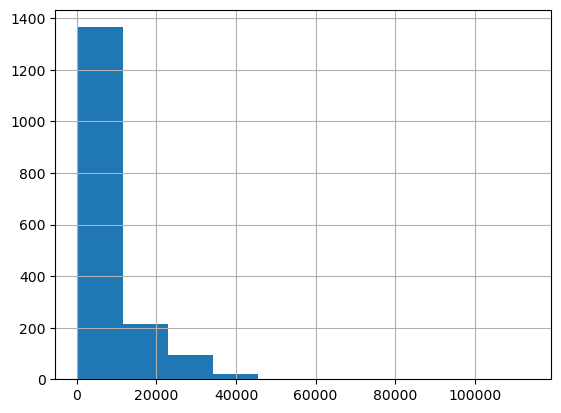

In [9]:
gap_df['gdpPercap'].hist(grid=True).figure.savefig('images/gdp_hist_pandas.png')

### Problem 7: `pandas` scatterplot

Similar to the `.hist()` method, pandas has a general `.plot()` method where you can specify the kind of plot.  Use this to create a scatterplot of GDP on the x-axis and Life Expectancy on the y-axis.  You will have to call `.plot()` on the entire DataFrame and specify the `x` and `y` arguments to the `.plot()` function with the `kind = scatter` argument.  Save your plot as `gdp_lifexp_scatter_pandas.png` to the `images` folder.


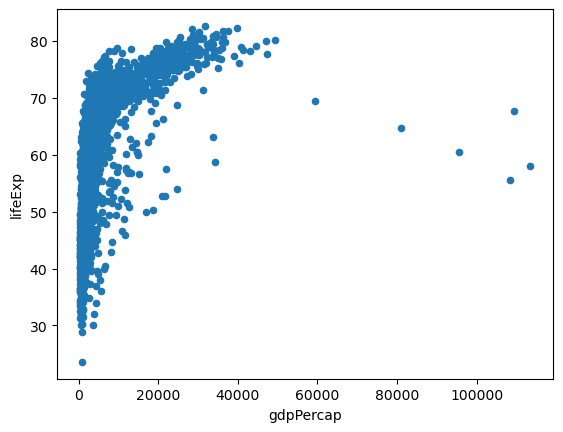

In [10]:
gap_df.plot(x='gdpPercap',y='lifeExp',kind='scatter')
plt.savefig('images/gdp_lifexp_scatter_pandas.png')

## Codio Activity 2.6: Computing the Sample Covariance Matrix

This activity focuses on using covariance and correlation to understand the strength of relationships between two quantitative variables.  Also, you will use a heatmap to visualize these relationships.  Finally, you identify situations where correlation is not an appropriate measure based on the assumption of a linear variable.

## Index:

- [Problem 1](#Problem-1:-Calculating-Covariance)
- [Problem 2](#Problem-2:-Calculating-Correlation)
- [Problem 3](#Problem-3:-Heatmap-of-Covariance)
- [Problem 4](#Problem-4:-Heatmap-of-Correlation)

### Covariance and Correlation

In probability theory and statistics, the mathematical concepts of covariance and correlation are very similar. Both describe the degree to which two random variables or sets of random variables tend to deviate from their expected values in similar ways.

If X and Y are two random variables, with means (expected values)  $\mu_X$ and  $\mu_Y$ and standard deviations  $σ_X$ and  $σ_Y$, respectively, then their covariance and correlation are as follows:

Covariance $$\text{cov}_{XY}=\sigma_{XY}=E[(X-\mu_{X})\,(Y-\mu_{Y})]$$

Correlation $$\text{corr}_{XY} = \rho_{XY} = E[(X - \mu_X)(Y - \mu_Y)]/(\sigma_X \sigma_Y)$$

so that

$$\rho_{XY}=\sigma_{XY}/(\sigma_{X} \sigma_{Y})$$


where E is the expected value operator. Notably, correlation is dimensionless while covariance is in units obtained by multiplying the units of the two variables. --[source](https://en.wikipedia.org/wiki/Covariance_and_correlation)

#### Dataset: Penguins

Our sample dataset comes from the `seaborn` visualization library and contains measurements of penguins of different species located on different islands.  Below, we load the data and display the first few rows and datatype information.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
penguin_df = pd.read_csv('DataSets_starter/penguins.csv')
penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


In [13]:
penguin_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### Problem 1: Calculating Covariance

Pandas DataFrame's have a built in `.cov()` method that will return the covariance between each numeric feature.

Use the `.cov()` method on `penguin_df` to create the covariance matrix.  Assign your solution to the variable `penguins_cov` below.

In [14]:
# the old pandas version can produce .cov() automatically, but new version needs to use select_dtypes(include = np.number)
penguins_cov = penguin_df.cov()

ValueError: could not convert string to float: 'Adelie'

In [15]:
penguin_df.select_dtypes(include = [int,float])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
...,...,...,...,...
328,47.2,13.7,214.0,4925.0
329,46.8,14.3,215.0,4850.0
330,50.4,15.7,222.0,5750.0
331,45.2,14.8,212.0,5200.0


In [16]:
penguin_df.select_dtypes(include = np.number)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
...,...,...,...,...
328,47.2,13.7,214.0,4925.0
329,46.8,14.3,215.0,4850.0
330,50.4,15.7,222.0,5750.0
331,45.2,14.8,212.0,5200.0


In [17]:
penguin_df.select_dtypes(exclude = np.number)

,species,island,sex
0,Adelie,Torgersen,Male
1,Adelie,Torgersen,Female
2,Adelie,Torgersen,Female
3,Adelie,Torgersen,Female
4,Adelie,Torgersen,Male
...,...,...,...
328,Gentoo,Biscoe,Female
329,Gentoo,Biscoe,Female
330,Gentoo,Biscoe,Male
331,Gentoo,Biscoe,Female


In [18]:
penguin_df.select_dtypes(include = np.number).cov()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,29.906333,-2.462091,50.058195,2595.623304
bill_depth_mm,-2.462091,3.877888,-15.947248,-748.456122
flipper_length_mm,50.058195,-15.947248,196.441677,9852.191649
body_mass_g,2595.623304,-748.456122,9852.191649,648372.487699


### Problem 2: Calculating Correlation

Similarly, pandas DataFrames have a built in `.corr()` method that computes the correlation matrix for numerical columns.  

Use the `.corr()` method on `penguins_df` and assign your results to the variable `penguin_corr`.

In [19]:
penguin_df.select_dtypes(include = np.number).corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


### Heatmap of Covariance

The code cell below displays a heatmap of the correlation matrix for the `penguin_df` dataframe. Run the code cell below.


<Axes: >

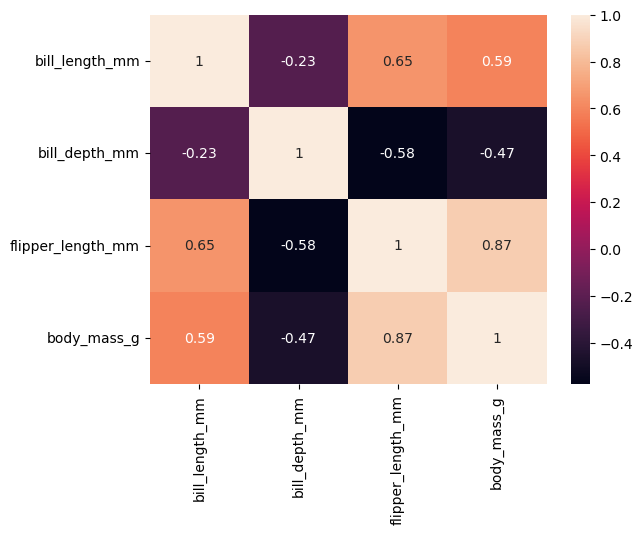

In [20]:
# annot = True shows the corr() values
sns.heatmap(penguin_df.select_dtypes(include = np.number).corr(), annot = True)

### Problem 3: Strongest Positive Correlation

Which two features have the strongest positive correlation?  Enter your answer as a list of strings using the exact column names to `highest_pos_corr` below.

In [21]:
highest_pos_corr = ['body_mass_g','flipper_length_mm']

### Problem 4: Interpreting negative correlation

The correlation between `body_mass_g` and `bill_depth_mm` reads -0.47.  Complete the following sentence that interprets this correlation.

```
As body mass increases bill depth ___________
```

Assign your solution as a string -- either `increases`, `decreases`, or `neither` to `ans_4` below.

In [22]:
ans_4 = 'decreases'

### Codio Activity 2.7: Approximating Correlation from Scatterplots

This assignment aims to reinforce your understanding of correlation.  

A scatterplot of two random variables is shown in an image, and you are asked to guess whether the variables are positively correlated, negatively correlated, or not correlated at all. 

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)


In [23]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Problem 1

Given the scatterplot below, determine whether the variables `x1` and `y` are positively, negatively, or not correlated. 

Assign your solution as a string -- either `positive`, `negative`, or `not` to `ans_1` below.

![](images/guess_1.png)

In [24]:
ans_1 = 'positive'

### Problem 2

Given the scatterplot below, determine whether the variables `x2` and `y` are positively, negatively, or not correlated. 

Assign your solution as a string -- either `positive`, `negative`, or `not` to `ans_2` below.


![](images/guess_2.png)

In [25]:
ans_2 = 'not'

### Problem 3

Given the scatterplot below, determine whether the variables `x3` and `y` are positively, negatively, or not correlated. 

Assign your solution as a string -- either `positive`, `negative`, or `not` to `ans_3` below.

![](images/guess_3.png)

In [26]:
ans_3 = 'positive'

### Problem 4

Given the scatterplot below, determine whether the variables `x4` and `y` are positively, negatively, or not correlated. 

Assign your solution as a string -- either `positive`, `negative`, or `not` to `ans_4` below.

![](images/guess_4.png)

In [29]:
ans_4 = 'negative'

### Problem 5

Given the scatterplot below, determine whether the variables `x5` and `y` are positively, negatively, or not correlated. 

Assign your solution as a string -- either `positive`, `negative`, or `not` to `ans_5` below.

![](images/guess_5.png)

In [30]:
ans_5 = 'not'

### Codio Activity 2.8: Histograms and Conditional Probability Distributions

This assignment uses `pandas` and `seaborn` to plot distributions of data conditioned on categorical features.  

#### Index:

- [Question 1](#Problem-1:-Conditional-Probabilities-with-`pandas`)
- [Question 2](#Problem-2:-$P(age->-40-|-class-=-~--'Second')$)
- [Question 3](#Problem-3:-Visualizing-the-Conditional-Probability)
- [Question 4](#Problem-4:-$P(\text{over 30}-|-\text{survived})$)
- [Question 5](#Problem-5:-Which-is-more-likely?)

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns

### The Dataset

For this assignment the dataset from `seaborn` relating to the titanic will be used.  This dataset contains specific information for each passenger on the titanic cruise ship.  Below the data is loaded, the first five rows displayed, and information on features displayed. 

In [51]:
# there are datasets inside seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [32]:
titanic = sns.load_dataset('titanic')

In [33]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Problem 1: Conditional Probabilities with `pandas`

Using the `titanic` data, conditional probabilities can be calculated by subsetting the data to the condition of interest and comparing the outcomes within this criteria.  For example, what is the probability given that someone is in first class that they are over the age of 40? 

To compute this, assign the following objects to the specified variable:

```python
first_class = #how many people in first class
first_class_over_40 = #how many people in first class were over the age of 40?
p_over_40_given_first_class = #p(age > 40 | class = First)
```

In [36]:
first_class = titanic.loc[titanic['class']=='First'].shape[0]
first_class

216

In [37]:
first_class_over_40 = titanic.loc[(titanic['class']=='First') & (titanic['age'] > 40)].shape[0]
first_class_over_40

76

In [39]:
p_over_40_given_first_class = first_class_over_40/first_class
p_over_40_given_first_class

0.35185185185185186

### Problem 2: $P(age > 40 | class = ~  'Second')$

Now compute the probability that a passenger is over the age of 40 given that the passenger was in second class.  

To compute this, assign the following objects to the specified variable:

```python
second_class = #how many people in second class
second_class_over_40 = #how many people in second class were over the age of 40?
p_over_40_given_second_class = #p(age > 40 | class = Second)
```

In [40]:
second_class = titanic.loc[titanic['class'] == 'Second'].shape[0]
second_class

184

In [41]:
second_class_over_40 = titanic.loc[(titanic['class'] == 'Second') & (titanic['age'] > 40)].shape[0]
second_class_over_40

34

In [42]:
p_over_40_given_second_class = second_class_over_40/second_class
p_over_40_given_second_class

0.18478260869565216

### Problem 3: Visualizing the Conditional Probability

To visualize the earlier conditional probabilities, draw a plot containing a histogram of the age distribution of passengers in first and second class. Follow the hints below for one approach and use `sns.histplot()` function for drawing the histograms.

<Axes: xlabel='age', ylabel='Count'>

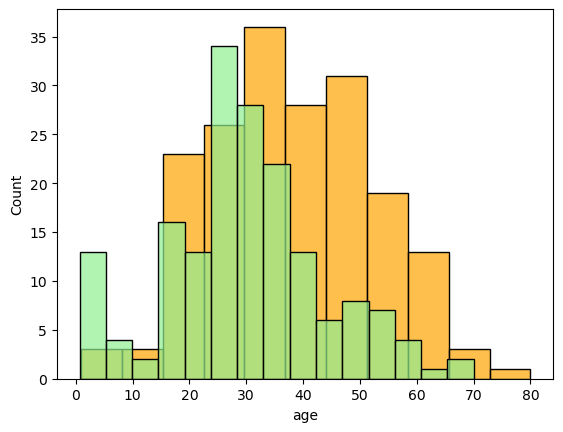

In [47]:
first_class = titanic.loc[titanic['class']=='First']['age']
second_class = titanic.loc[titanic['class'] == 'Second']['age']
sns.histplot(first_class, color = 'orange', alpha = 0.7)
sns.histplot(second_class, color = 'lightgreen', alpha = 0.7)

### Problem 4: $P(\text{over 30} | \text{survived})$

Compute the probability given that a passenger survived, given that they were over the age of 30. 


To compute this, assign the following objects to the specified variable:

```python
num_survived = #how many people survived
survived_over_30 = #how many of the survived people were over 30?
p_over_30_given_survived = #p(age > 30 | survived)
```

In [55]:
num_survived = titanic.loc[titanic['survived'] == 1].shape[0]
num_survived

342

In [56]:
survived_over_30 = titanic.loc[(titanic['survived'] == 1) & (titanic['age'] >30)].shape[0]
survived_over_30

124

In [57]:
p_over_30_given_survived = survived_over_30/num_survived
p_over_30_given_survived

0.36257309941520466

### Distribution of Ages for Survived and Not Survived



To plot below shows the distribution of ages for those that survived and those that did not together on the same axes.

In [58]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='Count'>

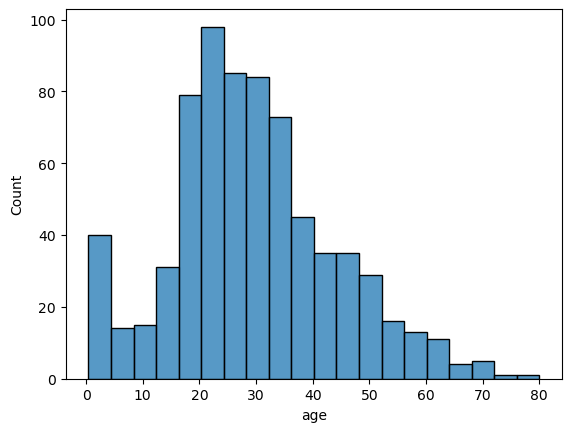

In [59]:
sns.histplot(data = titanic, x = 'age')

<Axes: xlabel='age', ylabel='Count'>

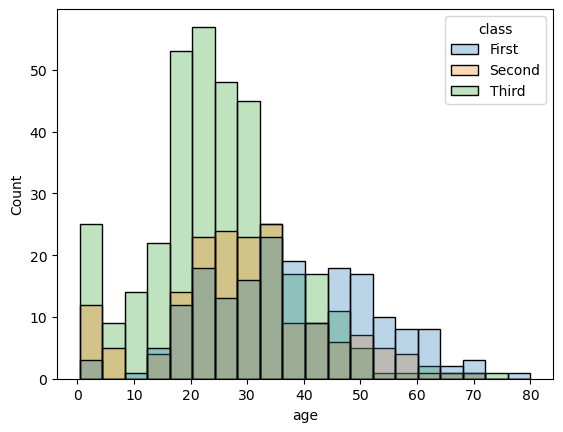

In [64]:
# hue means different group colors
sns.histplot(data = titanic, x = 'age', hue = 'class', alpha = 0.3)

<Axes: xlabel='age', ylabel='Count'>

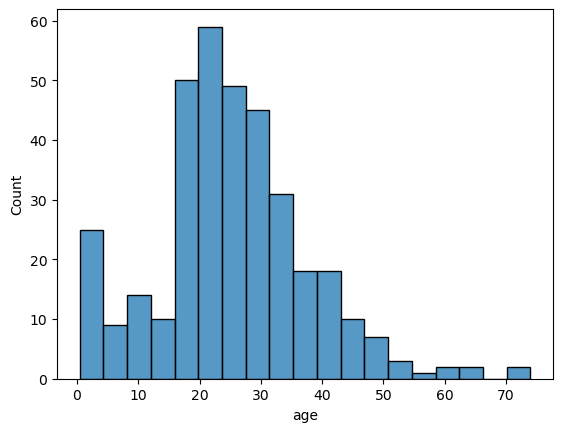

In [61]:
sns.histplot(data = titanic[titanic['class']=='Third'], x = 'age')

<Axes: xlabel='age', ylabel='Count'>

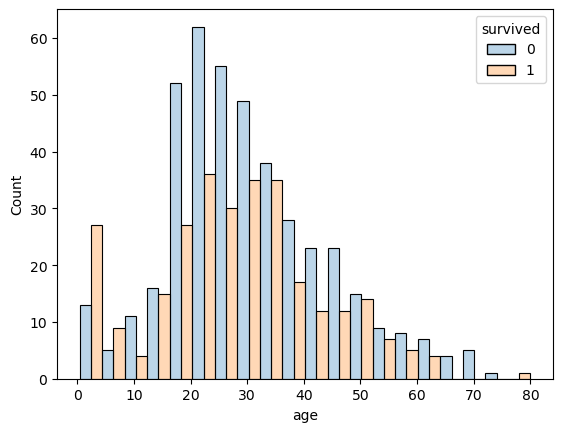

In [69]:
sns.histplot(data = titanic, x = 'age', hue = 'survived', alpha = 0.3, multiple = 'dodge')

<Axes: xlabel='age', ylabel='Count'>

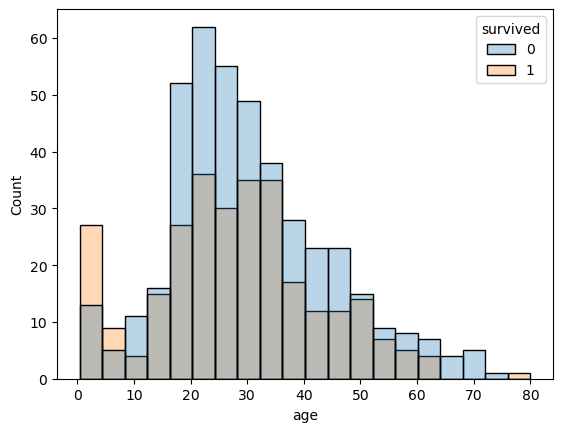

In [70]:
sns.histplot(data = titanic, x = 'age', hue = 'survived', alpha = 0.3)

### Problem 5: Which is more likely?

Based on your histogram above, given that a person was under the age of 20, is it more likely that they survived or that they did not survive?  

Assign your answer as a boolean value to the variable `survived` below. True means you believe more likely to have survived, False more likely to be deceased.

In [71]:
survived = False